In [1]:
import sys
sys.path.append("..")  # this is so we can import ethicml from the parent directory

In [2]:
from ethicml.algorithms.inprocess import LR, SVM, Majority, Kamiran
from ethicml.algorithms.preprocess import Calders, Upsampler
from ethicml.metrics import Accuracy, AbsCV, ProbPos, TPR, TNR, F1, BalancedAccuracy
from ethicml.preprocessing import BalancedTestSplit
from ethicml.evaluators import load_results, evaluate_models
from ethicml.data import Adult
from ethicml.visualisation import plot_results
from ethicml.utility import Results

In [ ]:
results = evaluate_models(
    datasets=[
        Adult(),
        Adult("Race-Binary"),
    ],
    inprocess_models=[
        LR(),
        SVM(),
        Majority(),
        Kamiran(),
        Kamiran(classifier="SVM"),
    ],
    preprocess_models=[
        Calders(preferable_class=1, disadvantaged_group=0),
        Upsampler(),
        Upsampler("preferential"),
        Upsampler("naive"),
    ],
    metrics=[Accuracy(), AbsCV(), F1(), ProbPos(), TPR(), TNR(), BalancedAccuracy()],
    per_sens_metrics=[Accuracy(), ProbPos(), TPR(), TNR()],
    repeats=10,
    delete_prev=False,
    splitter=BalancedTestSplit(),
    topic="kamiran_calders_variants",
    fair_pipeline=False,
)

  1%|          | 6/580 [02:19<3:41:38, 23.17s/it, model=Majority, dataset=Adult Sex, transform=no_transform, repeat=0]/mnt/data1/finn/EthicML/ethicml/evaluators/per_sensitive_attribute.py:109: RuntimeWarning: invalid value encountered in double_scalars
  ratio_per_sens[key] = min_val / max_val
  2%|▏         | 11/580 [06:34<5:40:31, 35.91s/it, model=Majority, dataset=Adult Sex, transform=Calders, repeat=0]/mnt/data1/finn/EthicML/ethicml/evaluators/per_sensitive_attribute.py:109: RuntimeWarning: invalid value encountered in double_scalars
  ratio_per_sens[key] = min_val / max_val
  3%|▎         | 16/580 [08:56<5:15:23, 33.55s/it, model=Majority, dataset=Adult Sex, transform=Upsample uniform, repeat=0]/mnt/data1/finn/EthicML/ethicml/evaluators/per_sensitive_attribute.py:109: RuntimeWarning: invalid value encountered in double_scalars
  ratio_per_sens[key] = min_val / max_val
  4%|▎         | 21/580 [10:48<4:47:53, 30.90s/it, model=Majority, dataset=Adult Sex, transform=Upsample preferent

In [4]:
results.data

Accuracy  \
dataset           transform      model                      split_id             
Adult Sex         no_transform   Logistic Regression, C=1.0 0         0.898775   
                                 SVM                        0         0.909323   
                                 Majority                   0         0.886356   
                                 Kamiran & Calders LR       0         0.899456   
                                 Kamiran & Calders SVM      0         0.919530   
...                                                                        ...   
Adult Race-Binary Upsample naive SVM                        8         0.831092   
                                 Majority                   8         0.841772   
                                 Logistic Regression, C=1.0 9         0.809731   
                                 SVM                        9         0.834652   
                                 Majority                   9         0.841772   

                                                                      Accuracy_sex_Male_0  \
dataset           transform      model                      split_id                        
Adult Sex         no_transform   Logistic Regression, C=1.0 0                    0.921742   
                                 SVM                        0                    0.927526   
                                 Majority                   0                    0.886356   
                                 Kamiran & Calders LR       0                    0.910514   
                                 Kamiran & Calders SVM      0                    0.925145   
...                                                                                   ...   
Adult Race-Binary Upsample naive SVM                        8                         NaN   
                                 Majority                   8                         NaN   
                                 Logistic Regression, C=1.0 9                         NaN   
                                 SVM                        9                         NaN   
                                 Majority                   9                         NaN   

                                                                      Accuracy_sex_Male_0-sex_Male_1  \
dataset           transform      model                      split_id                                   
Adult Sex         no_transform   Logistic Regression, C=1.0 0                               0.045934   
                                 SVM                        0                               0.036407   
                                 Majority                   0                               0.000000   
                                 Kamiran & Calders LR       0                               0.022116   
                                 Kamiran & Calders SVM      0                               0.011228   
...                                                                                              ...   
Adult Race-Binary Upsample naive SVM                        8                                    NaN   
                                 Majority                   8                                    NaN   
                                 Logistic Regression, C=1.0 9                                    NaN   
                                 SVM                        9                                    NaN   
                                 Majority                   9                                    NaN   

                                                                      Accuracy_sex_Male_0/sex_Male_1  \
dataset           transform      model                      split_id                                   
Adult Sex         no_transform   Logistic Regression, C=1.0 0                               0.950166   
                                 SVM                        0                               0.960748   
                        

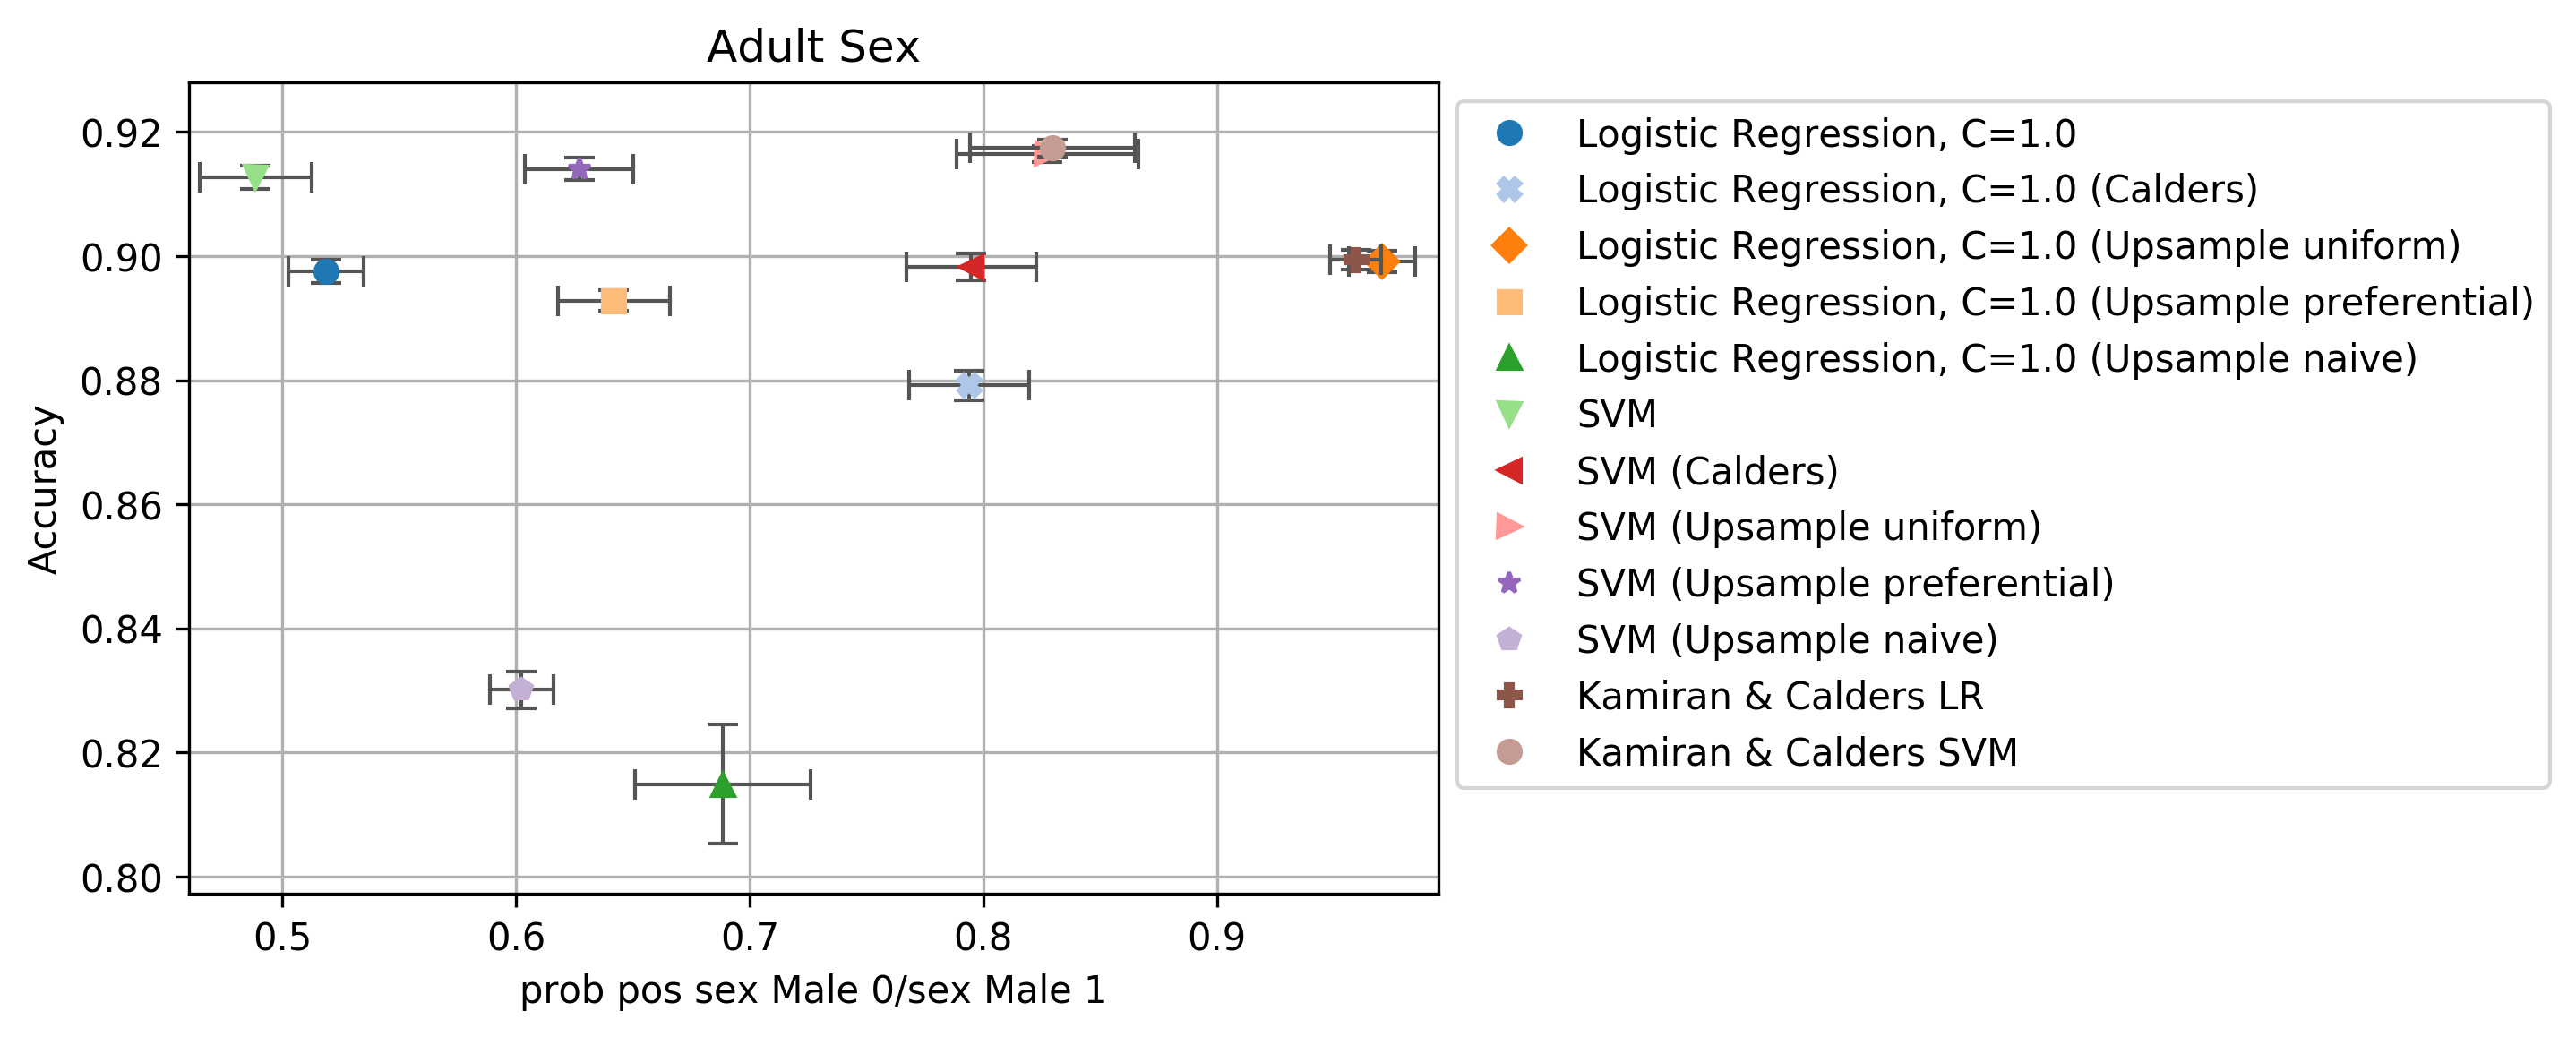

In [5]:
(fig1, _), = plot_results(results, "Accuracy", "prob_pos_sex_Male_0/sex_Male_1", transforms_separately=False, ptype="cross")
fig1

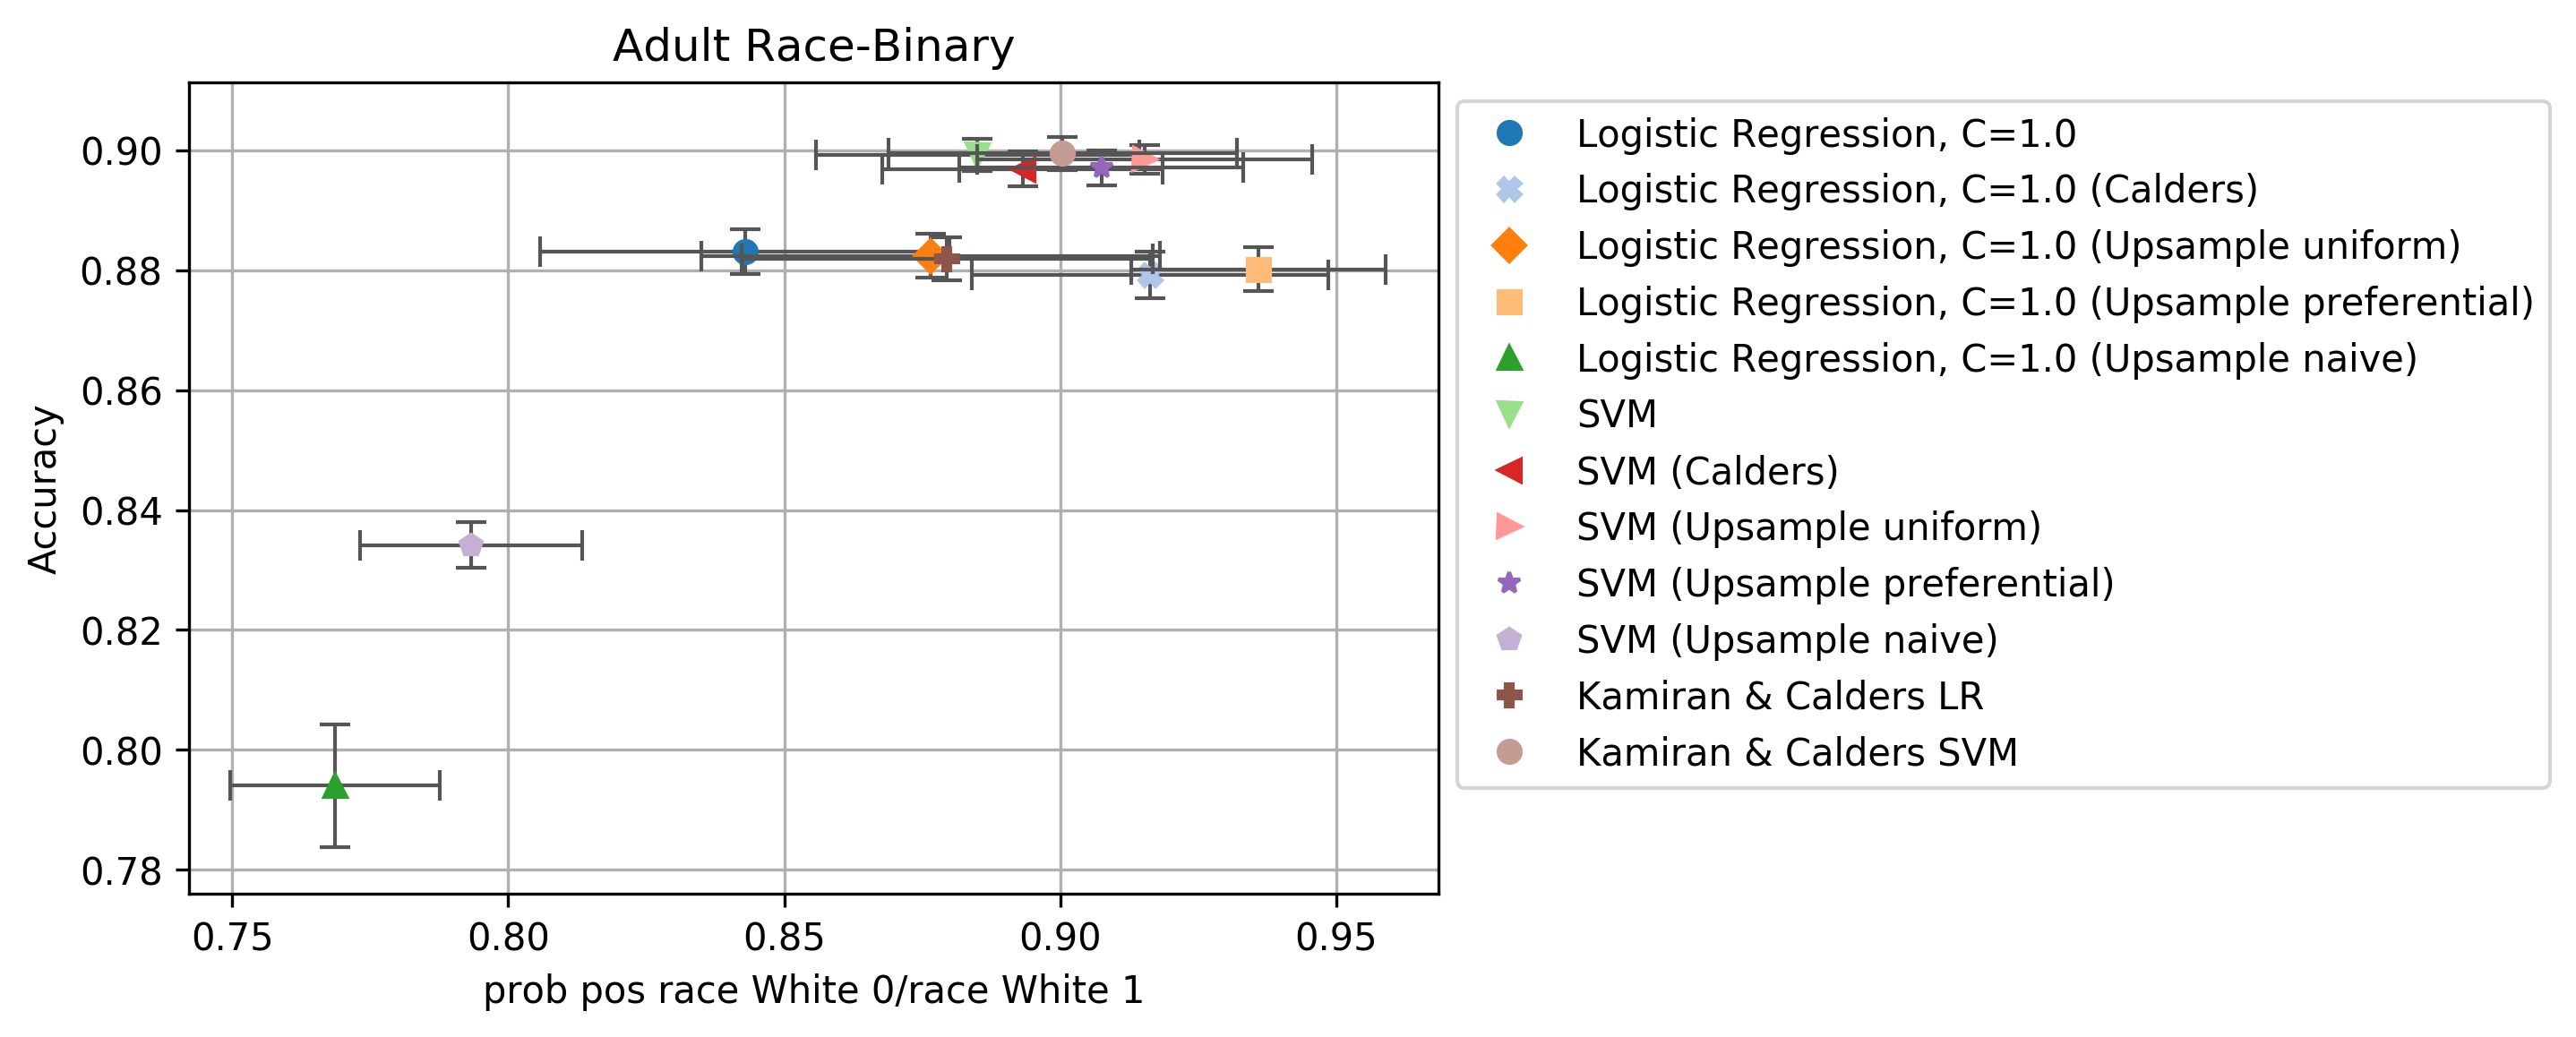

In [7]:
(fig2, _), = plot_results(results, "Accuracy", "prob_pos_race_White_0/race_White_1", transforms_separately=False, ptype="cross")
fig2